In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from minisom import MiniSom

In [12]:
# Load the dataset assuming there is no header, and the separator is comma
file_path = 'https://raw.githubusercontent.com/raccamateo/NEC_A3/main/A3-data.txt'
NEC_data = pd.read_csv(file_path, header=None, sep=',')

In [13]:
# Check the first few rows to ensure they do not contain non-numeric values
print(NEC_data.head())

# Assuming the last column is the class label and all columns are numeric
X = NEC_data.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
y = NEC_data.iloc[:, -1].apply(pd.to_numeric, errors='coerce')

# Drop rows with any non-numeric values that could not be converted
X = X.dropna()
y = y.loc[X.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

                      0                    1                    2  \
0                     x                    y                    z   
1  -0.03167552503351045    -9.91205374378826  -0.5794361762587491   
2  0.002525986943430307    6.172455978669437   3.2883390705617175   
3   0.18312326558487735  -0.3878405546593373    6.236469772860241   
4  -0.04226222449397611  -1.9962722949660403  -1.6553020311874493   

                     3      4  
0                    t  class  
1   -1.044238808635487      1  
2  -1.0064274917407479      5  
3  -1.6914911528415706      2  
4   -2.995310745078718      1  


In [14]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert y to a numpy array
y_array = y.to_numpy().flatten()

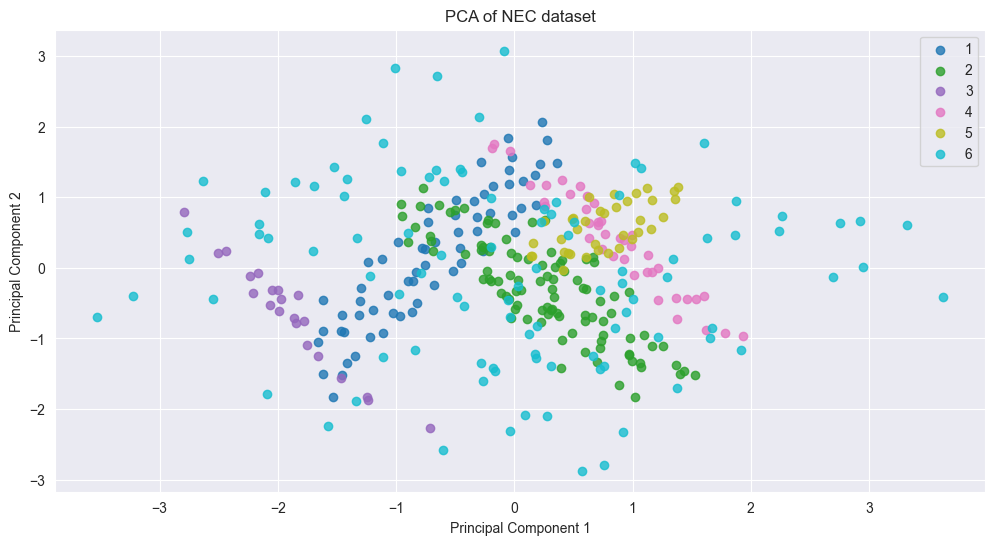

In [18]:
# Create scatter plot of the first two principal components
# Generate a color map that includes all unique labels
unique_labels = np.unique(y_array)

# Create a color map using a colormap from matplotlib
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Now you can safely plot without KeyError
plt.figure(figsize=(12, 6))
for label in unique_labels:
    index = y_array == label
    plt.scatter(X_pca[index, 0], X_pca[index, 1], color=color_map[label], alpha=.8, label=int(label))

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of NEC dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


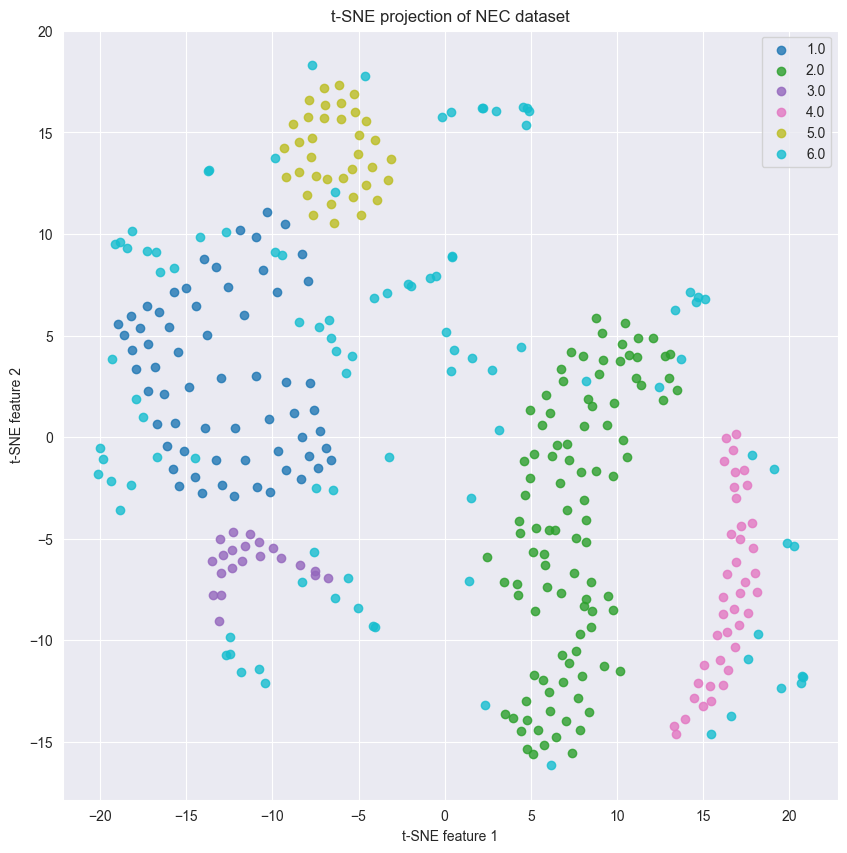

In [19]:
# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Label encoding for class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_array)

# Scatter plot for t-SNE projections
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(X_tsne[y_encoded == i, 0], X_tsne[y_encoded == i, 1], color=color_map[label], alpha=.8, label=label_encoder.inverse_transform([i])[0])

plt.legend()
plt.title('t-SNE projection of NEC dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


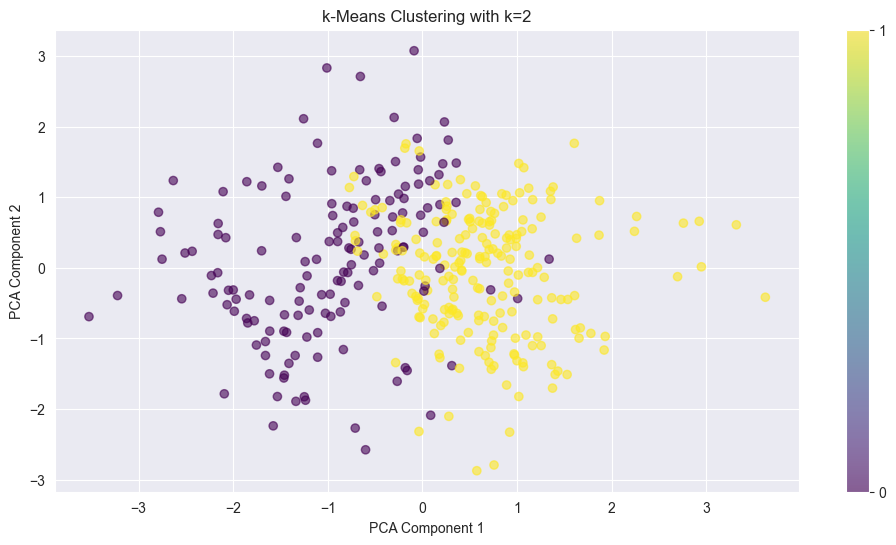

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


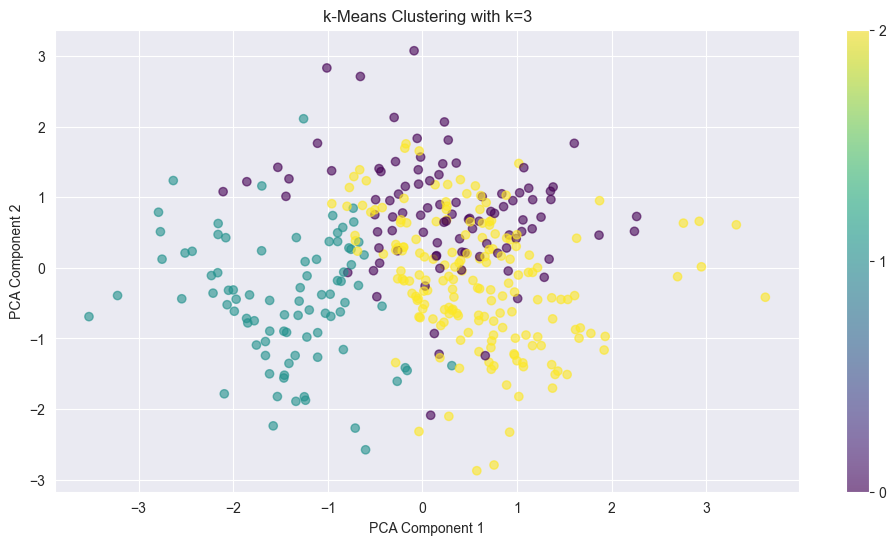

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


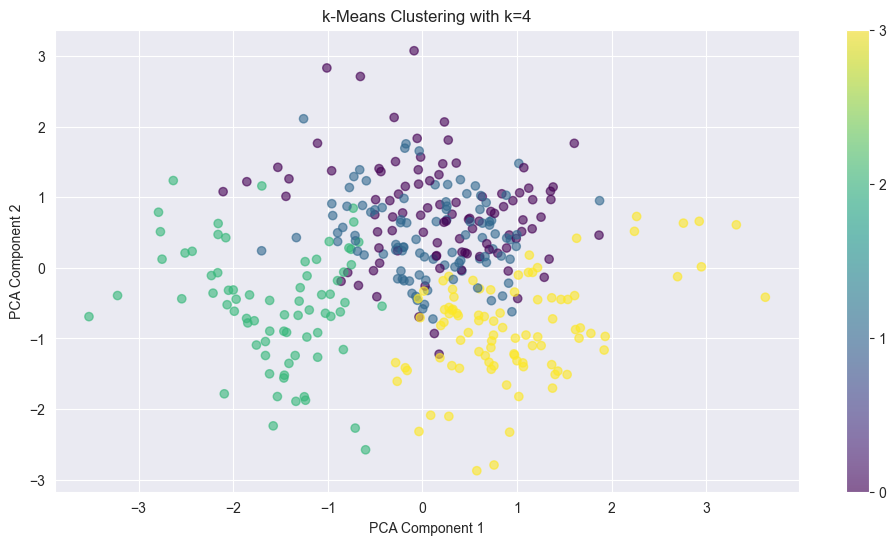

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


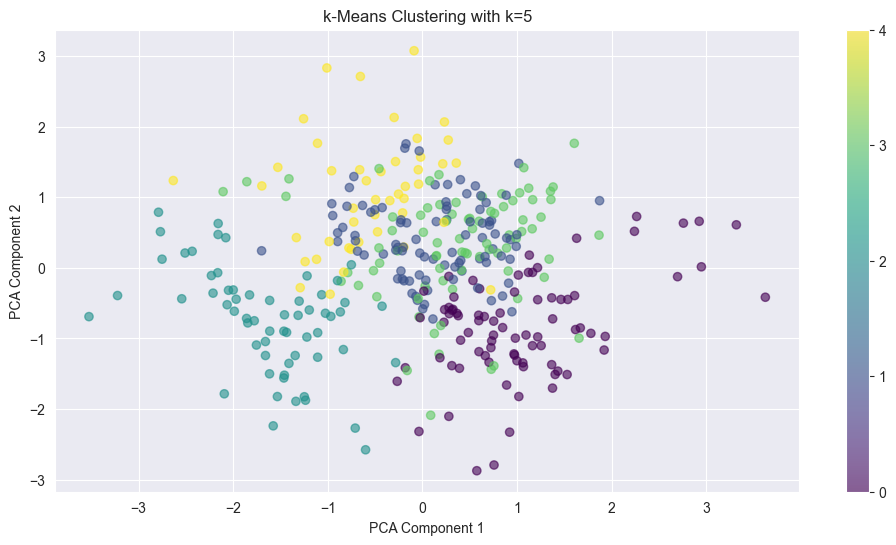

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


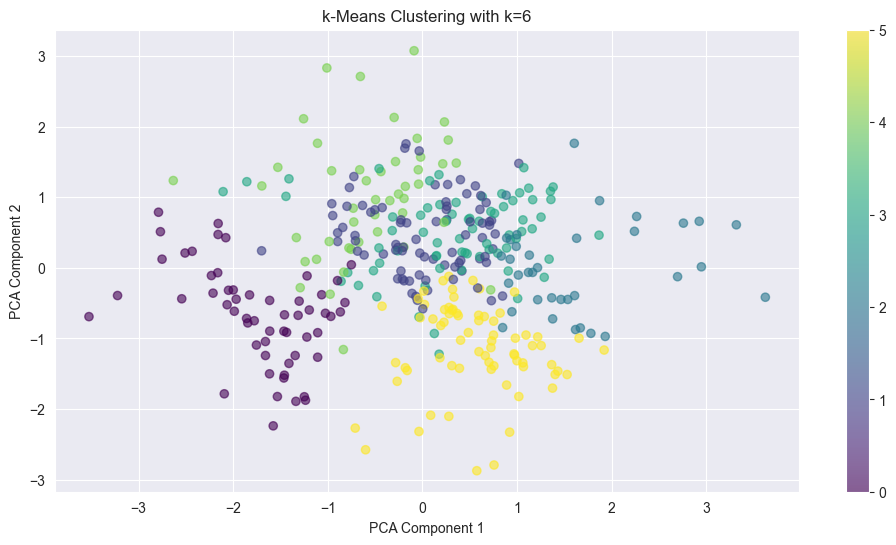

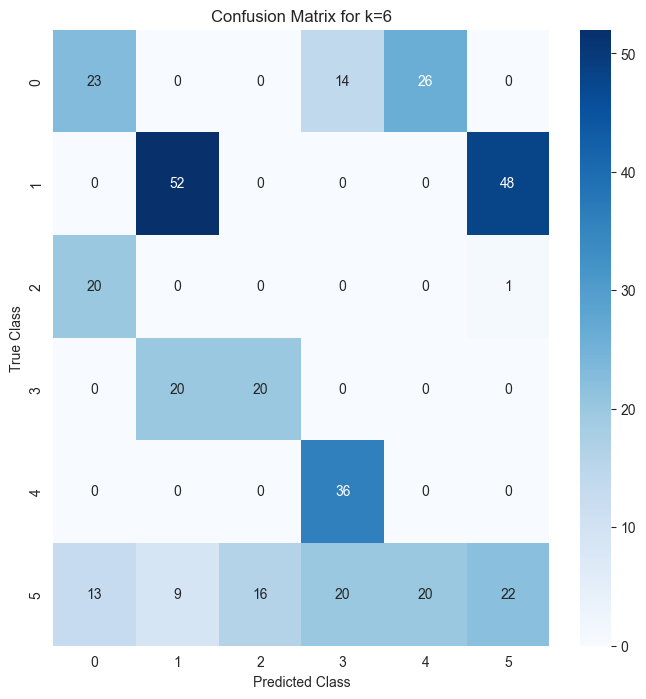

In [25]:
# k-means clustering
max_k = 6  # Define the maximum k 
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # Plotting the clusters
    plt.figure(figsize=(12, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.colorbar(ticks=range(k))
    plt.title(f'k-Means Clustering with k={k}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

    # Confusion matrix (if k matches the number of actual classes)
    if k == len(unique_labels):
        cm = confusion_matrix(y_encoded, cluster_labels)
        plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for k={k}')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

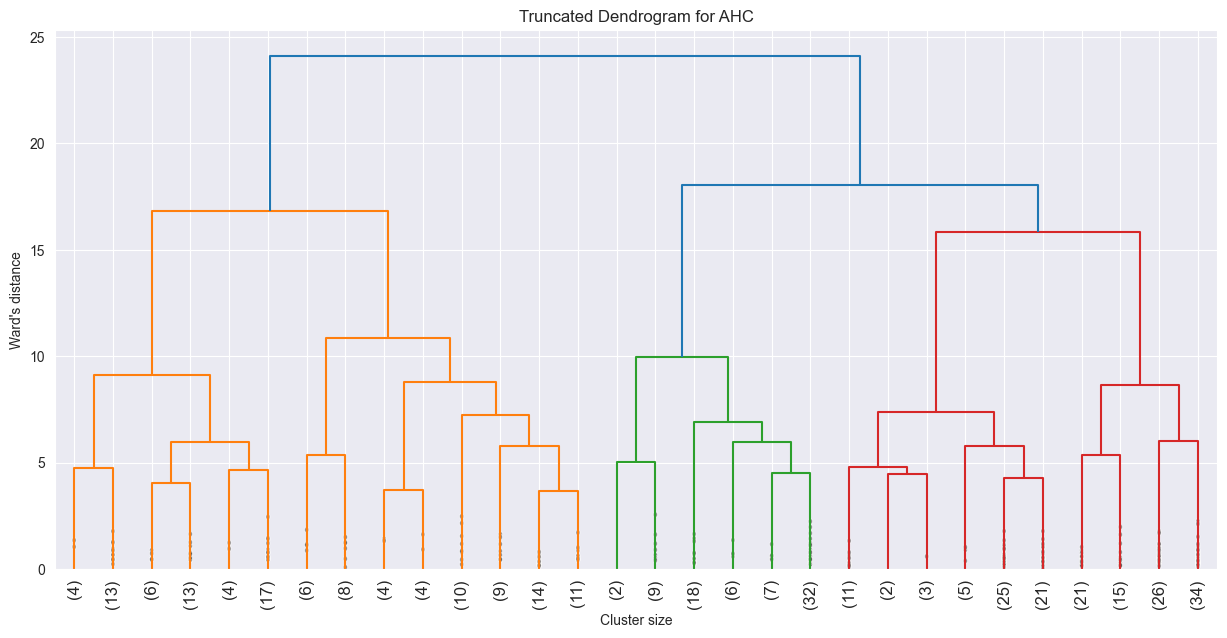

In [22]:
# Agglomerative Hierarchical Clustering (AHC)
linkage_matrix = linkage(X_scaled, method='ward')

# Truncated dendrogram
plt.figure(figsize=(15, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # for example, show only the last 30 merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts of samples in the node
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Truncated Dendrogram for AHC')
plt.xlabel('Cluster size')
plt.ylabel('Ward\'s distance')
plt.show()


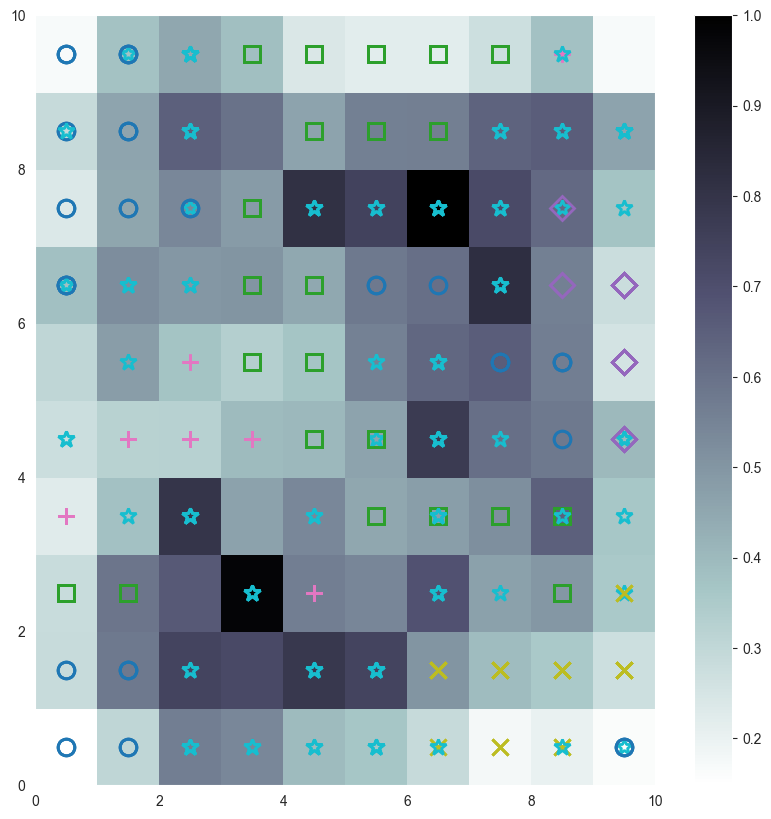

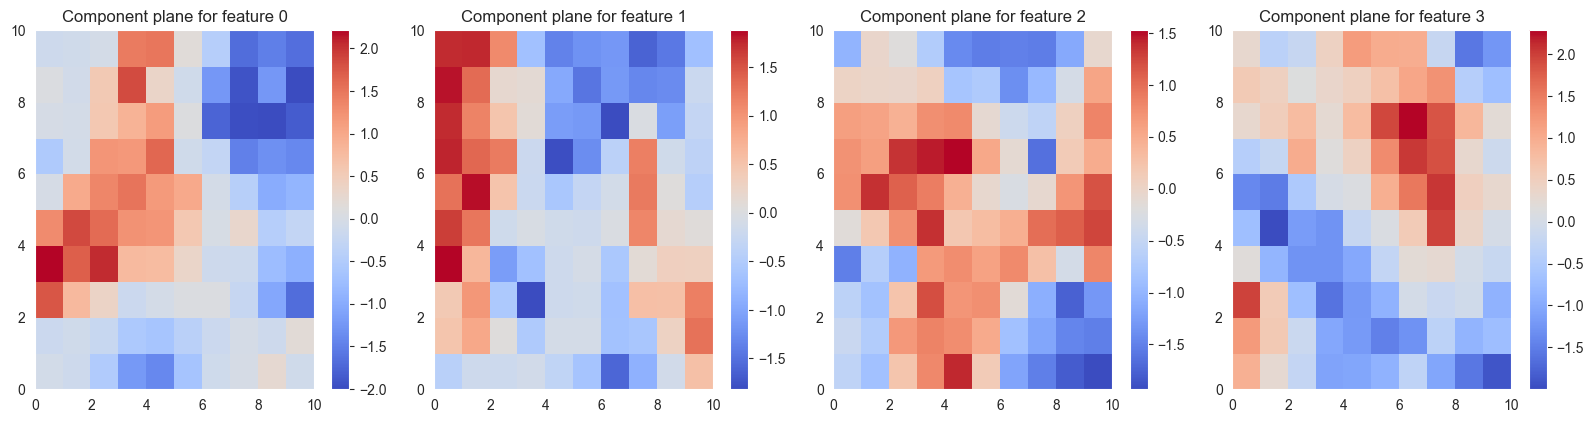

In [24]:
# Self-Organizing Map (SOM)
# Encode the labels to integers for visualization
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define markers and colors for each unique label in y_encoded
unique_labels = np.unique(y_encoded)
markers = ['o', 's', 'D', '+', 'x', '*', '^', '<', '>', 'p', 'h']  # extend this as needed
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # or another colormap that you prefer

# Now plot the SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # U-matrix
plt.colorbar()

# Overlay class labels
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)  # winning neuron for the sample
    plt.plot(w[0]+.5, w[1]+.5, markers[y_encoded[cnt] % len(markers)], 
             markerfacecolor='None',
             markeredgecolor=colors[y_encoded[cnt] % len(colors)], 
             markersize=12, markeredgewidth=2)

plt.show()

# Plot the component planes
plt.figure(figsize=(20, 20))
for i in range(X_scaled.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.title(f'Component plane for feature {i}')
    plt.pcolor(som.get_weights()[:, :, i], cmap='coolwarm')
    plt.colorbar()
plt.tight_layout()
plt.show()
